In [ ]:
#Importando as bibliotecas

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sf

In [ ]:
LOW-PASS WINDOWED-SINC FILTER

In [ ]:
#Declarando as variaveis
#Iniciando as listas com todas as posições = 0

In [24]:
X = np.zeros(4999)
Y = np.zeros(4999)
H = np.zeros(100)

FS = 8000 #Frequencia
FC = float((1000)/FS) #Frequencia de corte normalizado
tam = 100 #Tamanho do filtro

In [ ]:
#Laço de repetição ára gerar a lista de coeficientes

In [25]:
#Gera os coeficientes
for i in range(len(H)):
    if(i - (tam/2)) == 0:
        H[i] = 2 * np.pi * FC
    if(i - tam/2) != 0:
        H[i] = np.sin(2 * np.pi * FC * (i - tam/2)) / (i - tam/2)
    H[i] = H[i] * (0.54 - 0.46 * np.cos(2 * np.pi * i / tam)) 
    
print(H)

[ 1.60000000e-03  1.16755891e-03 -2.56034571e-18 -1.32616921e-03
 -2.05329882e-03 -1.61085214e-03  1.25060038e-17  2.03547357e-03
  3.25949827e-03  2.61472832e-03 -5.13899095e-18 -3.36444866e-03
 -5.38616925e-03 -4.30204399e-03  7.55561043e-18  5.44712201e-03
  8.63293160e-03  6.82236571e-03 -1.05362955e-17 -8.45477783e-03
 -1.32617394e-02 -1.03774663e-02  1.38937586e-17  1.26322456e-02
  1.96583216e-02  1.52735065e-02 -1.74170382e-17 -1.83741171e-02
 -2.84634275e-02 -2.20347049e-02  2.08847535e-17  2.63988006e-02
  4.08810263e-02  3.16786621e-02 -2.40790153e-17 -3.82017369e-02
 -5.95153597e-02 -4.64999766e-02  2.67991164e-17  5.74965296e-02
  9.12147817e-02  7.29412736e-02 -2.88741428e-17 -9.65928515e-02
 -1.61282864e-01 -1.38237395e-01  3.01737129e-17  2.33781790e-01
  4.98186381e-01  7.06464937e-01  7.85398163e-01  7.06464937e-01
  4.98186381e-01  2.33781790e-01  3.01737129e-17 -1.38237395e-01
 -1.61282864e-01 -9.65928515e-02 -2.88741428e-17  7.29412736e-02
  9.12147817e-02  5.74965

In [ ]:
# Em primeiro momento realiza a soma de todos os coeficientes
# Após isso ele divide os valores de H pelo valor da soma total
# Realiza a convolução

In [26]:
SUM = 0
#Soma todos os coeficientes
for i in range(len(H)):
    SUM = SUM + H[i] 

#Divide os coefiecientes pela soma de todos eles
for i in range(len(H)):
    H[i] = H[i] / SUM

for j in range(100, 4999): 
    Y[j] = 0
    for i in range(len(H)):
        Y[j] = Y[j] + X[j-i] * H[i]
        
print(H)
        

[ 5.09311611e-04  3.71657070e-04 -8.15008626e-19 -4.22145861e-04
 -6.53605583e-04 -5.12766062e-04  3.98090808e-18  6.47931451e-04
  1.03756270e-03  8.32319683e-04 -1.63584235e-18 -1.07097048e-03
 -1.71452409e-03 -1.36942560e-03  2.40510008e-18  1.73392656e-03
  2.74803269e-03  2.17169380e-03 -3.35391101e-18 -2.69132283e-03
 -4.22147367e-03 -3.30335254e-03  4.42265787e-18  4.02109335e-03
  6.25763215e-03  4.86185887e-03 -5.54418737e-18 -5.84884448e-03
 -9.06047132e-03 -7.01408191e-03  6.64802967e-18  8.40325979e-03
  1.30132384e-02  1.00839440e-02 -7.66482631e-18 -1.21603676e-02
 -1.89449148e-02 -1.48018613e-02  8.53068822e-18  1.83022813e-02
  2.90354672e-02  2.32186485e-02 -9.19121011e-18 -3.07474130e-02
 -5.13395221e-02 -4.40036942e-02  9.60488895e-18  7.44173627e-02
  1.58582568e-01  2.24881747e-01  2.50007753e-01  2.24881747e-01
  1.58582568e-01  7.44173627e-02  9.60488895e-18 -4.40036942e-02
 -5.13395221e-02 -3.07474130e-02 -9.19121011e-18  2.32186485e-02
  2.90354672e-02  1.83022

In [ ]:
#Salva os coeficientes gerados em um arquivo que ja existe

In [27]:
#Grava os coeficientes em um arquivo existente
with open("coefSimuPA.dat", "w") as f:
    for s in H:
        f.write(str(s) +",\n")

In [ ]:
#Plota o grafico com os valores de H

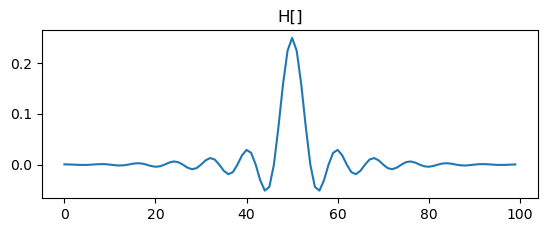

In [28]:
#Plotando o gráfico
plt.subplot(2, 1, 1)
plt.title("H[]")
plt.plot(H)

In [ ]:
#Utiliza a função freqz para calcular a resposta em frequencia
#Plota o grafico da resposta em frequencia

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

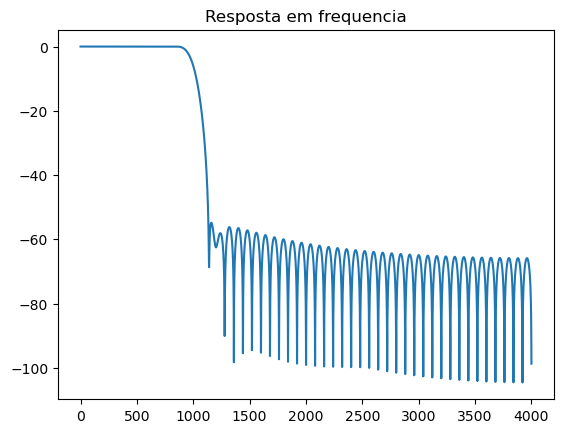

In [29]:
[w, H] = sf.freqz(H, 1,FS)
plt.plot(w*FS/(2*np.pi), 20*np.log10(abs(H)))
plt.title('Resposta em frequencia')
plt.grid